Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from urllib.request import urlretrieve

In [2]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(csv_url, names = col_names)
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Loading the dataset

In [3]:
#To display stats about data
iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#basic info abt datatype
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#to display no of samples on each class
iris['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

Preprocessing the dataset

In [7]:
#check for null values
iris.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64

#Exploratory Data Analysis

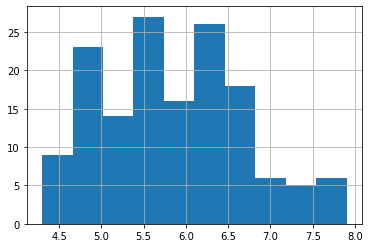

In [8]:
iris['Sepal_Length'].hist()

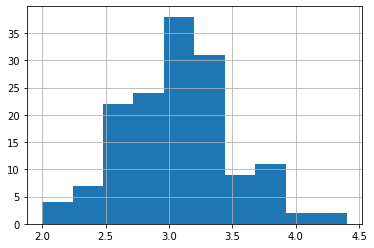

In [9]:
iris['Sepal_Width'].hist()

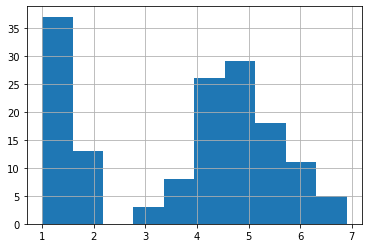

In [10]:
iris['Petal_Length'].hist()

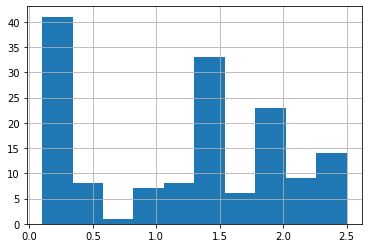

In [11]:
iris['Petal_Width'].hist()

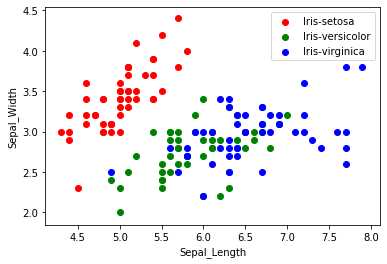

In [17]:
#scatterplot
colors=['red','green','blue']
classes=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x=iris[iris['Class'] == classes[i]]
    plt.scatter(x['Sepal_Length'],x['Sepal_Width'],c=colors[i],label=classes[i])
plt.xlabel("Sepal_Length")
plt.ylabel("Sepal_Width")
plt.legend()

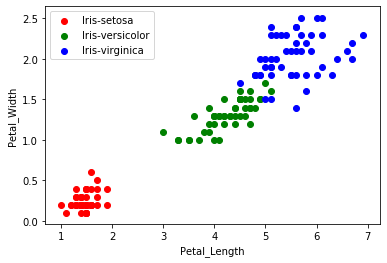

In [18]:
#scatterplot
colors=['red','green','blue']
classes=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x=iris[iris['Class'] == classes[i]]
    plt.scatter(x['Petal_Length'],x['Petal_Width'],c=colors[i],label=classes[i])
plt.xlabel("Petal_Length")
plt.ylabel("Petal_Width")
plt.legend()

###Corelation matrix

In [19]:
iris.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.109369,0.871754,0.817954
Sepal_Width,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.871754,-0.420516,1.000000,0.962757
Petal_Width,0.817954,-0.356544,0.962757,1.000000


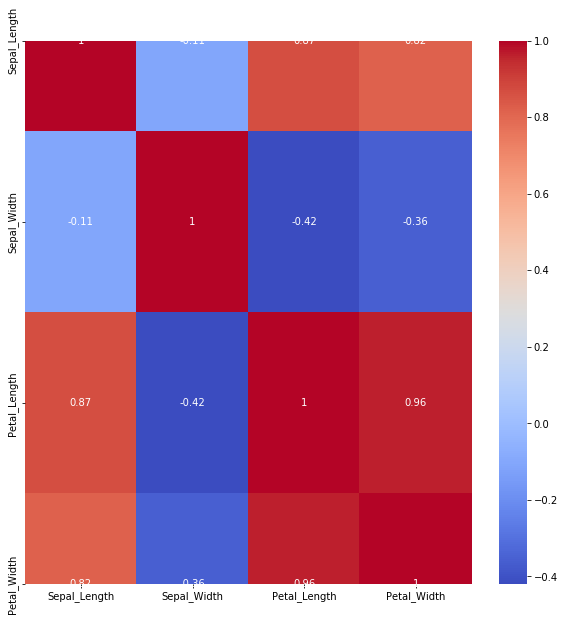

In [22]:
corr = iris.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

Label encoder

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
iris['Class']=le.fit_transform(iris['Class'])
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model training

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#train-70
#test-30
X=iris.drop(columns=['Class'])
Y=iris['Class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [ ]:
https://youtu.be/pTjsr_0YWas?si=ZvV-qScHIjpQS_7K